In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from tensorflow.keras.datasets import mnist

In [3]:
(train_images, train_labesl), (test_images, test_labesl) = mnist.load_data()

In [4]:
print("Training data shape: ", train_images.shape)
print("Testing data shape: ", test_images.shape)

Training data shape:  (60000, 28, 28)
Testing data shape:  (10000, 28, 28)


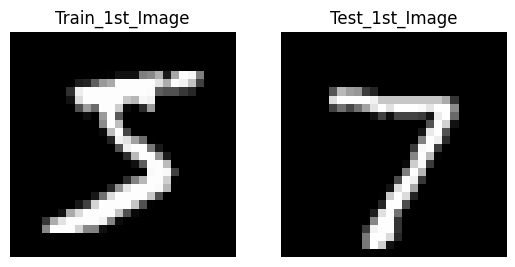

In [5]:
plt.subplot(121),plt.title("Train_1st_Image"),plt.imshow(train_images[0], cmap='gray'),plt.axis('off')
plt.subplot(122),plt.title("Test_1st_Image"),plt.imshow(test_images[0], cmap='gray'),plt.axis('off')
plt.show()

In [6]:
#normalize pixel values to between 0 and 1
train_images = train_images / 255
test_images = test_images / 255

#flatten the image for classifiers
train_images_flat = train_images.reshape(train_images.shape[0], -1)
test_images_flat = test_images.reshape(test_images.shape[0], -1)

In [7]:
#split the data into tarining and validation data
x_train, x_val, y_train, y_val = train_test_split(train_images_flat, train_labesl, test_size=0.2, random_state=42)

print("Training Data shape:", x_train.shape)
print("Validation Data shape:", x_val.shape)
print("Testing Data shape:",test_images_flat.shape)

Training Data shape: (48000, 784)
Validation Data shape: (12000, 784)
Testing Data shape: (10000, 784)


In [8]:
#train the SVC classifier
svc = SVC()
svc.fit(x_train, y_train)

#predict on the validation set
y_val_pred = svc.predict(x_val)

#calculate accuracy on the validation set
accuracy_val = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy: ", accuracy_val)

Validation Accuracy:  0.9775833333333334


In [9]:
#predict on the test set
y_test_pred = svc.predict(test_images_flat)

#calculate accuracy on the validation set
accuracy_test = accuracy_score(test_labesl, y_test_pred)
print("Validation Accuracy: ", accuracy_test)

Validation Accuracy:  0.9777


In [10]:
import cv2 as cv
import matplotlib.pyplot as plt

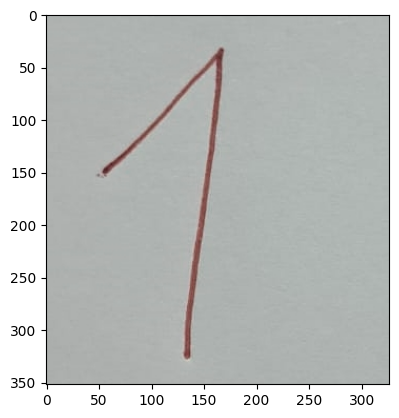

In [11]:
test_img_1 = cv.imread('test_img1.jpeg')
plt.imshow(test_img_1)

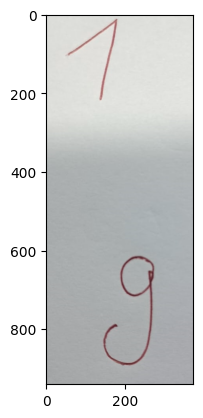

In [12]:
test_img_2 = cv.imread('test_img2.jpeg')
plt.imshow(test_img_2)

In [13]:
print(test_img_2.shape)
print(test_img_1.shape)

(941, 375, 3)
(352, 327, 3)


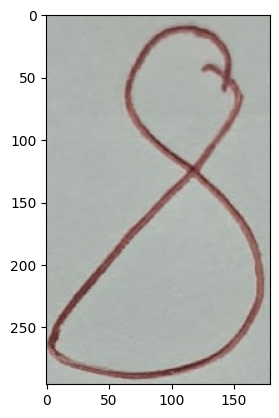

In [14]:
test_img_3 = cv.imread("test_img3.jpeg",)
plt.imshow(test_img_3)

In [20]:
test_imge3 = cv.cvtColor(test_img_3, cv.COLOR_BGR2GRAY)
test_img_3 = cv.resize(test_img_3,(28, 28))
testimg3_array = np.array(test_img_3) / 255.0
testimg3_flat = testimg3_array.reshape(1, -1)


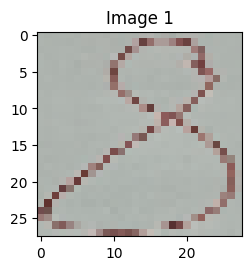

In [21]:
plt.figure(figsize=(10, 5))

plt.subplot(221)
plt.imshow(testimg3_array, cmap='gray')
plt.title('Image 1')

plt.tight_layout()
plt.show()

In [22]:
prediction1 = svc.predict(testimg3_flat)
print("Original for Image 1: 8   Prediction for Image 1:", prediction1[0])

ValueError: X has 2352 features, but SVC is expecting 784 features as input.

import numpy as np
import cv2
image1 = cv2.imread('/content/0_image.jpg')
image2 = cv2.imread('/content/1_image.jpg')
image3 =cv2.imread('/content/6_image.jpg')
image4 = cv2.imread('/content/7_image.jpg')

# Convert images to grayscale
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
image3 = cv2.cvtColor(image3, cv2.COLOR_BGR2GRAY)
image4 = cv2.cvtColor(image4, cv2.COLOR_BGR2GRAY)


# Resize images to 28x28
image1 = cv2.resize(image1,(28, 28))
image2 = cv2.resize(image2,(28, 28))
image3 = cv2.resize(image3,(28, 28))
image4 = cv2.resize(image4,(28, 28))

# Convert to numpy arrays and normalize
image1_array = np.array(image1) / 255.0
image2_array = np.array(image2) / 255.0
image3_array = np.array(image3) / 255.0
image4_array = np.array(image4) / 255.0

# Flatten the images
image1_flat = image1_array.reshape(1, -1)
image2_flat = image2_array.reshape(1, -1)
image3_flat = image3_array.reshape(1, -1)
image4_flat = image4_array.reshape(1, -1)


import matplotlib.pyplot as plt
# Display the images
plt.figure(figsize=(10, 5))

plt.subplot(221)
plt.imshow(image1_array, cmap='gray')
plt.title('Image 1')

plt.subplot(222)
plt.imshow(image2_array, cmap='gray')
plt.title('Image 2')

plt.subplot(223)
plt.imshow(image3_array, cmap='gray')
plt.title('Image 3')

plt.subplot(224)
plt.imshow(image4_array, cmap='gray')
plt.title('Image 4')

plt.tight_layout()
plt.show()

# Make predictions
prediction1 = svc.predict(image1_flat)
prediction2 = svc.predict(image2_flat)
prediction3 = svc.predict(image3_flat)
prediction4 = svc.predict(image4_flat)

# Print the predictions
print("Original for Image 1: 0   Prediction for Image 1:", prediction1[0])
print("Original for Image 2: 1   Prediction for Image 2:", prediction2[0])
print("Original for Image 3: 6   Prediction for Image 3:", prediction3[0])
print("Original for Image 4: 7   Prediction for Image 4:", prediction4[0])


IMAGE CLUSTERING

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
from tensorflow.keras.datasets import mnist

In [ ]:
# load the mnist data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
#flatten the images for the Kmeans algo
